In [1]:
!pip install ..

Processing /Users/elew/AssuredAutonomy/csaf_release
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for csaf: filename=csaf-0.0.1-py3-none-any.whl size=426769 sha256=5419738fe21029d6438715e9b917e0366043b98558248ff620505cb6cd6f5cd4
  Stored in directory: /private/var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/pip-ephem-wheel-cache-j0j8d630/wheels/a5/5e/9d/e067d9ce19b7562bf0a990e503f455aa35030d7d3761637501
Successfully built csaf
  Attempting uninstall: csaf
    Found existing installation: csaf 0.0.1
    

In [2]:
import csaf_f16.ngoals as f16g
from csaf_f16.acas import AcasScenarioViewer

import re
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Scenario 1: Rejoin

### Summary

Ownship is attempting to fly north at a constant airspeed, while intruder is attempting a eastward turn while position to west of the intruder. Both aircraft start at the same north  / south position (flying in formation).


### Coordinates

* **Altitude** - Discrete - {15k, 35k} ft - Both aircraft are positioned at the same altitude
* **Airspeed** - Discrete - {600, 1k} ft/s - The ownship is given this airspeed
* **Relative East / West Distance** - Continuous - [7k, 10k] ft - Intruder is placed at the origin and intruder is placed at (0, relative distance)
* **Relative Intruder Airspeed** - Continuous - [-150, 300] ft/s - Ownship is giving the above airspeed and intruder is given ownship's airspeed + relative value
* **Relative Intruder Heading Angle** - Continuous - [-pi, pi] rad - Ownship is facing North and intruder is given this heading angle

In [3]:
ar = f16g.AcasRejoinScenario()
sys = ar.generate_system((15E3, 1000.0, 12000.0, 0.0, 0.0))
trajs = sys.simulate_tspan((0.0, 20.0))
av = AcasScenarioViewer(trajs, ar)

 /var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/ipykernel_34904/3582249161.py:2: MatplotlibDeprecationWarning:The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
 /var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/ipykernel_34904/3582249161.py:3: MatplotlibDeprecationWarning:The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


Text(6000.0, 500.0, 'horizontal distance')

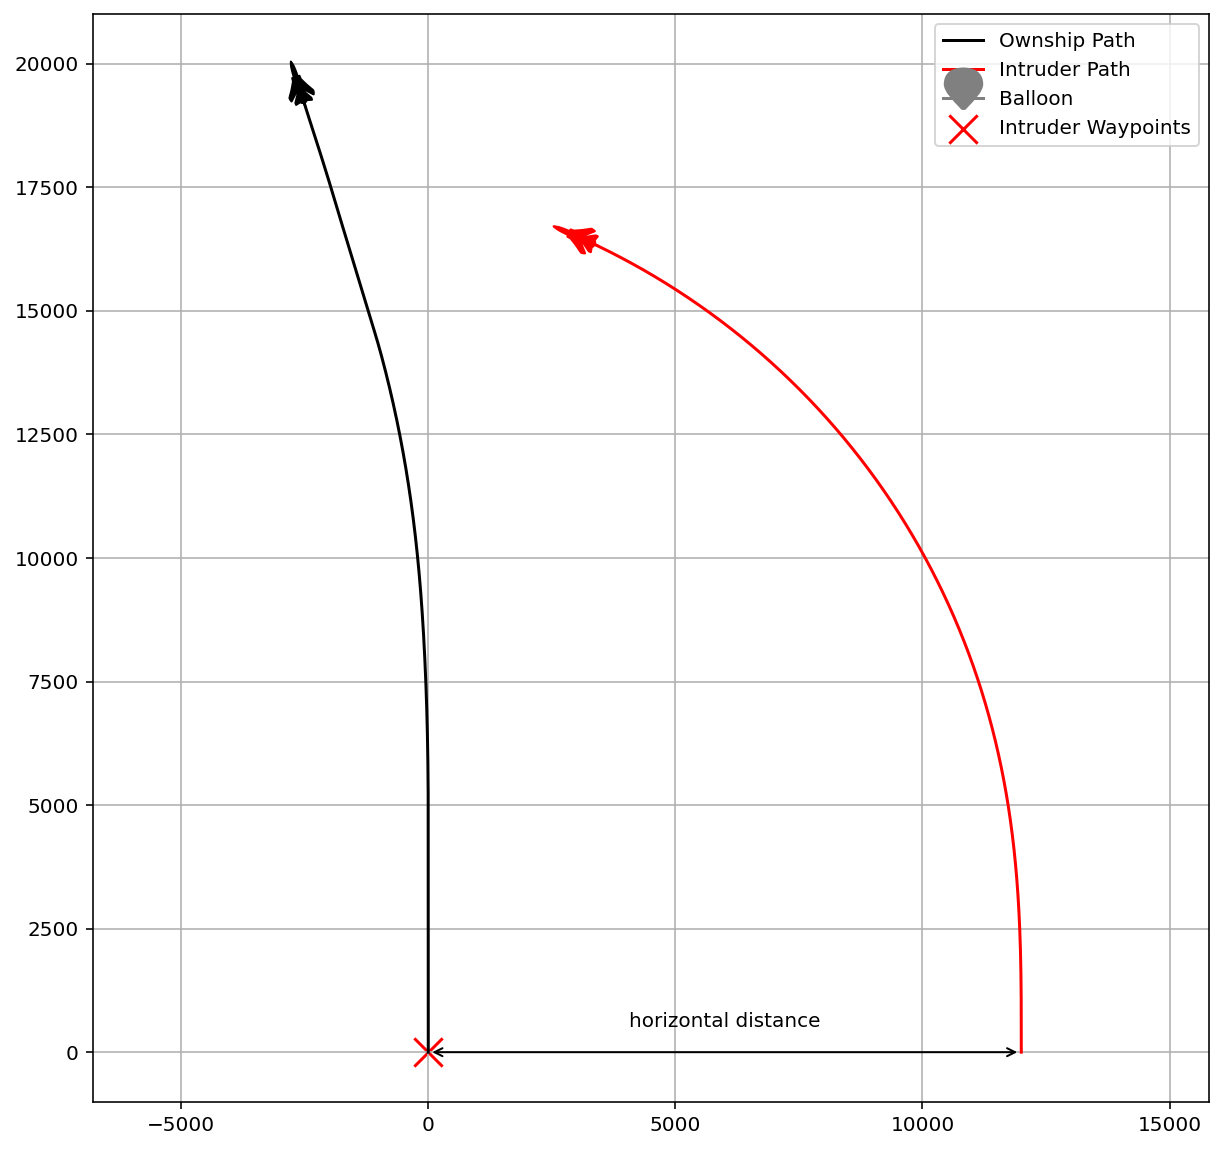

<Figure size 720x720 with 0 Axes>

In [4]:
f, ax = av.summary_plot(bounds = ((-3000, 12000), (-1000, 21000)))
ax.annotate(s='', xy=(0.0,0.0), xytext=(12000.0,0), arrowprops=dict(arrowstyle='<->'))
ax.annotate(s='horizontal distance', xy=(6000.0,500.0), ha='center')

## Scenario 2: Airport

### Summary

Ownship and intruder are turning into one another. The ownship has ACAS-Xu autopilot, while the intruder does not. Both aircraft start at the same North  / South position.

### Coordinates

* **Altitude** - Discrete - {15k, 35k} ft - Both aircraft are positioned at the same altitude
* **Airspeed** - Discrete - {600, 1k} ft/s - The ownship is given this airspeed
* **Relative East / West Distance** - Continuous - [7k, 10k] ft - Intruder is placed at the origin and intruder is placed at (0, relative distance)
* **Relative Intruder Airspeed** - Continuous - [-150, 300] ft/s - Ownship is giving the above airspeed and intruder is given ownship's airspeed + relative value
* **Relative Intruder Heading Angle** - Continuous - [-pi, pi] rad - Ownship is facing North and intruder is given this heading angle

In [5]:
ar = f16g.AcasAirportScenario()
sys = ar.generate_system((15E3, 1000.0, 12000.0, 0.0, 0.0))
trajs = sys.simulate_tspan((0.0, 20.0))
av = AcasScenarioViewer(trajs, ar)

 /var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/ipykernel_34904/2047408055.py:2: MatplotlibDeprecationWarning:The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
 /var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/ipykernel_34904/2047408055.py:3: MatplotlibDeprecationWarning:The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


Text(0.0, 500.0, 'horizontal distance')

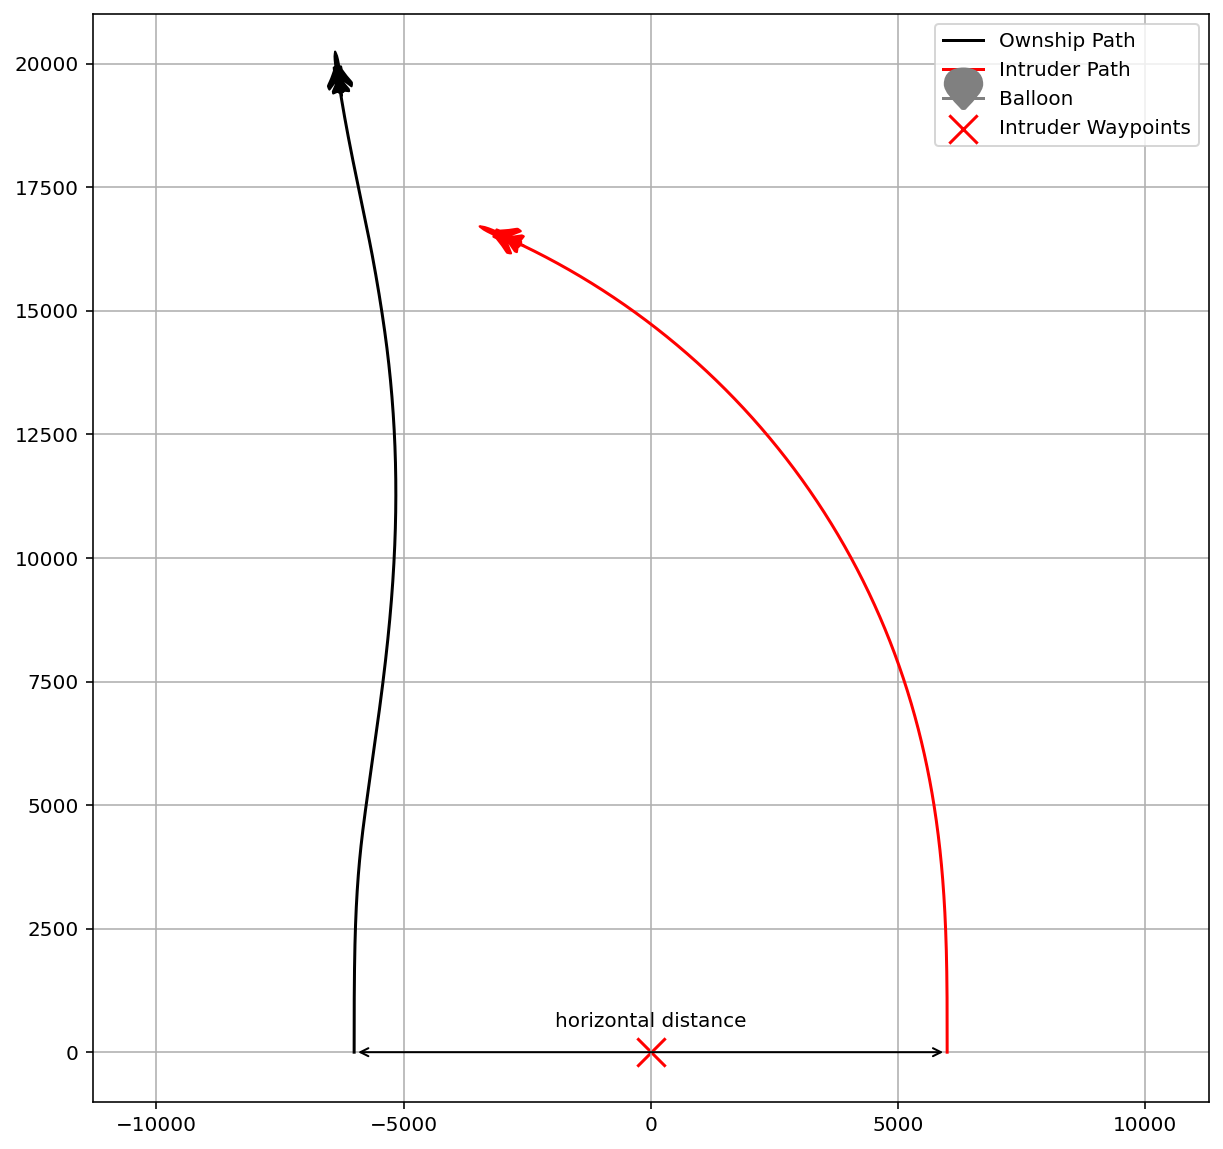

<Figure size 720x720 with 0 Axes>

In [6]:
f, ax = av.summary_plot(bounds = ((-6000, 6000), (-1000, 21000)))
ax.annotate(s='', xy=(-6000.0,0.0), xytext=(6000.0,0.0), arrowprops=dict(arrowstyle='<->'))
ax.annotate(s='horizontal distance', xy=(0.0,500.0), ha='center')

## Scenario 3: Head On

### Summary

Both aircraft are at the same east / west position and can be positioned head on. Both attempt to fly straight at a constant airspeed.

### Coordinates

* **Altitude** - Discrete - {15k, 35k} ft - Both aircraft are positioned at the same altitude
* **Airspeed** - Discrete - {600, 1k} ft/s - The ownship is given this airspeed
* **Relative North / South Distance** - Continuous - [7k, 10k] ft - Intruder is placed at the origin and intruder is placed at (relative distance, 0)
* **Relative Intruder Airspeed** - Continuous - [-150, 300] ft/s - Ownship is giving the above airspeed and intruder is given ownship's airspeed + relative value
* **Relative Intruder Heading Angle** - Continuous - [-pi, pi] rad - Ownship is facing North and intruder is given this heading angle

In [7]:
ar = f16g.AcasHeadOnScenario()
sys = ar.generate_system((15E3, 1000.0, 12000.0, 0.0, -3.141592))
trajs = sys.simulate_tspan((0.0, 10.0))
av = AcasScenarioViewer(trajs, ar)

 /var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/ipykernel_34904/1520052288.py:2: MatplotlibDeprecationWarning:The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
 /var/folders/b_/ypw986g95m7b1d_6lbv80ykr0000gp/T/ipykernel_34904/1520052288.py:3: MatplotlibDeprecationWarning:The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


Text(-2500.0, 6000.0, 'vertical distance')

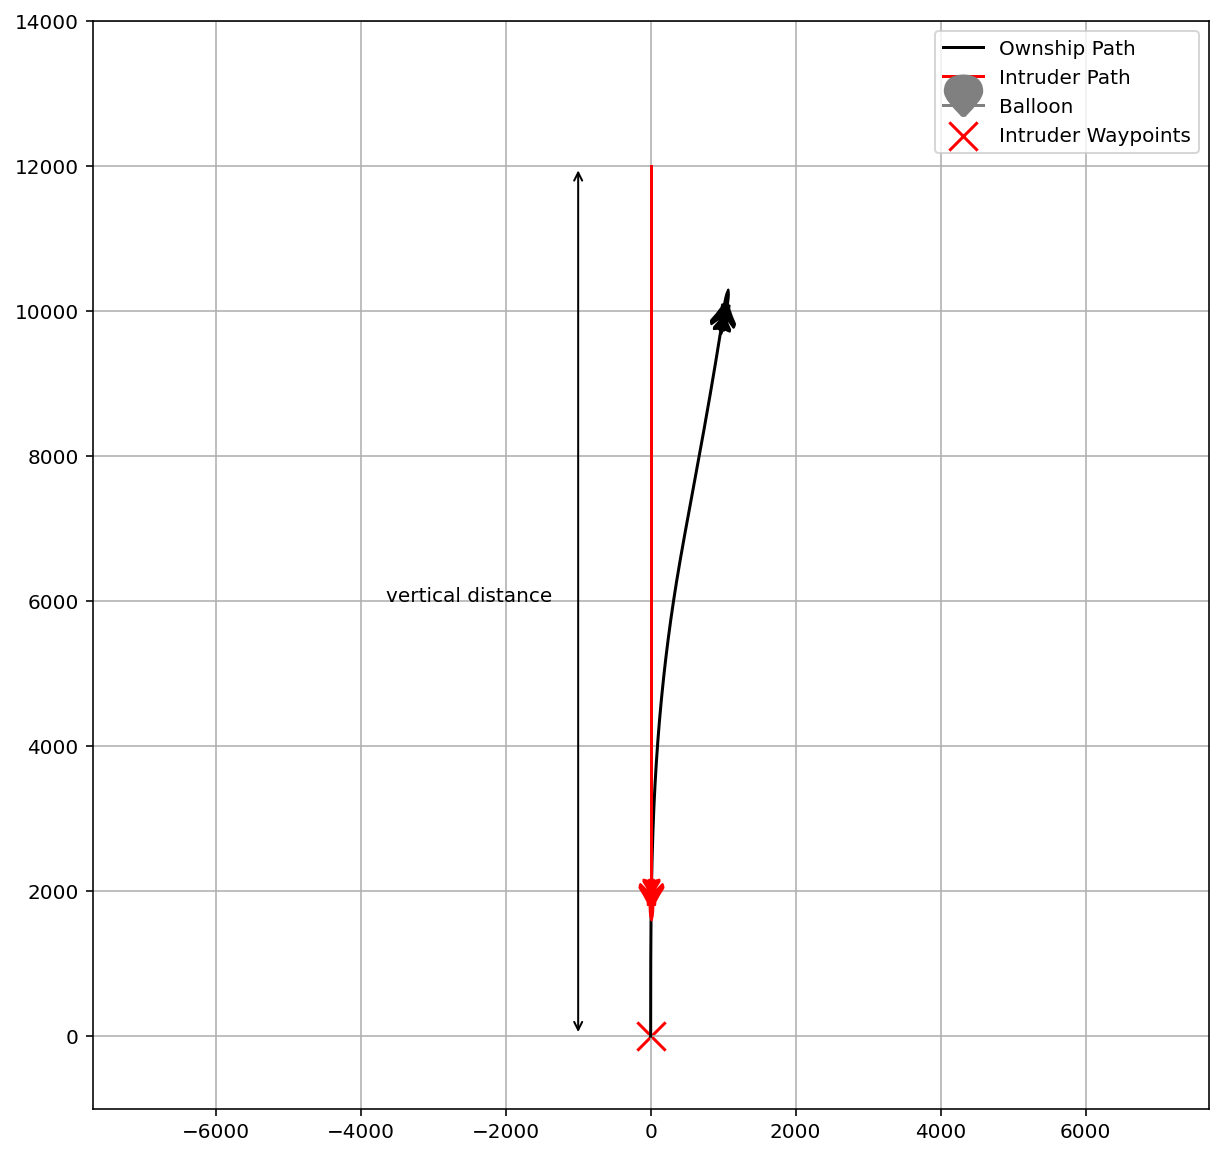

<Figure size 720x720 with 0 Axes>

In [8]:
f, ax = av.summary_plot(bounds = ((-3000, 3000), (-1000, 14000)))
ax.annotate(s='', xy=(-1000.0,0.0), xytext=(-1000.0,12000.0), arrowprops=dict(arrowstyle='<->'))
ax.annotate(s='vertical distance', xy=(-2500.0,6000.0), ha='center')

## Goal Falsification

Constrained Bayesion optimization is used to attempt to falsify the 250 ft well clear region.

#### Constraints

* minimum distance to the intruder is set to 7000 ft.
* the airspeed of the intruder is constrained to be "reasonable" (meaning not to trip a simulation error). This works out to be between [550, 1100] ft/s.

#### Kernel

* an standard periodic kernel is used with ARD turned on to created different lengthscales. 20 ft/s is used for speed quantities, 200 ft is used for distances, and 0.01 rad is used for angular.

In [9]:
def video_title(scen):
    """generate a filename for a scenario object"""
    scen_sc = re.sub('(?!^)([A-Z]+)', r'_\1',scen.__class__.__name__).lower()
    return f"{scen_sc}_{datetime.now().strftime('%m_%d_%H_%M')}"


In [10]:
#g = f16g.AcasRejoin()
#g = f16g.AcasHeadOnGoal()
g = f16g.AcasAirportGoal()

In [11]:
g.test(max_time=60*5)

[1.50000000e+04 1.00000000e+03 9.28260506e+03 4.76481565e+00
 1.78247828e+00]
OBJECTIVE (min distance):  9282.614879827108 , 1145678.799504072
[ 3.50000000e+04  1.00000000e+03 -9.81182217e+03 -7.21572647e+01
 -1.86115579e+00]
OBJECTIVE (min distance):  9811.831062787842 , 1177925.403639657
[ 1.50000000e+04  8.00000000e+02 -8.60224894e+03  3.79501270e+01
  1.76352120e+00]
OBJECTIVE (min distance):  6119.7415189728845 , 930278.3794141241
[ 1.50000000e+04  8.00000000e+02 -9.58966363e+03  7.52304471e+01
  1.67496860e+00]
OBJECTIVE (min distance):  6321.370039168196 , 945478.067501086
[ 3.50000000e+04  8.00000000e+02 -9.45875610e+03 -4.39120543e+01
  1.72177196e+00]
OBJECTIVE (min distance):  6776.2543251912675 , 978905.4294009709
[ 1.50000000e+04  8.00000000e+02 -8.78261030e+03  4.31043997e+01
  1.55016239e+00]
OBJECTIVE (min distance):  5691.407431548159 , 897131.5467149061
[ 1.50000000e+04  1.00000000e+03 -9.82713139e+03 -4.78104645e+01
  1.60075418e+00]
OBJECTIVE (min distance):  6947.2

True

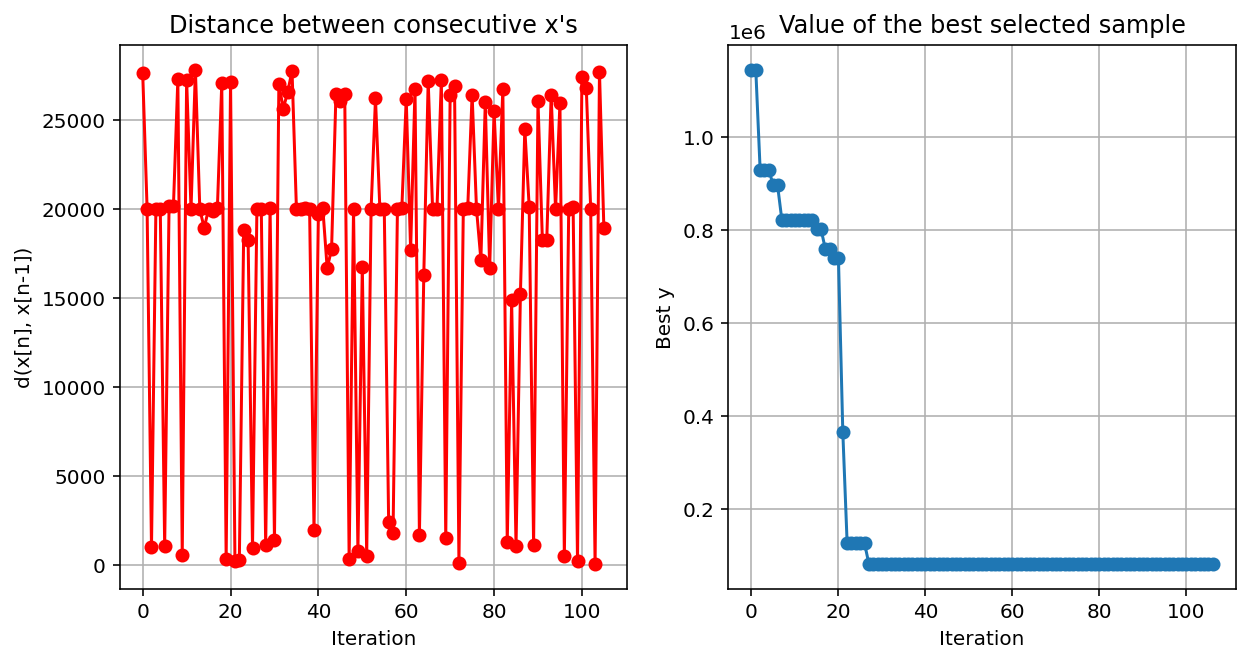

In [12]:
# plot GPyOpt's Convergence Information
g.optimizer.plot_convergence()

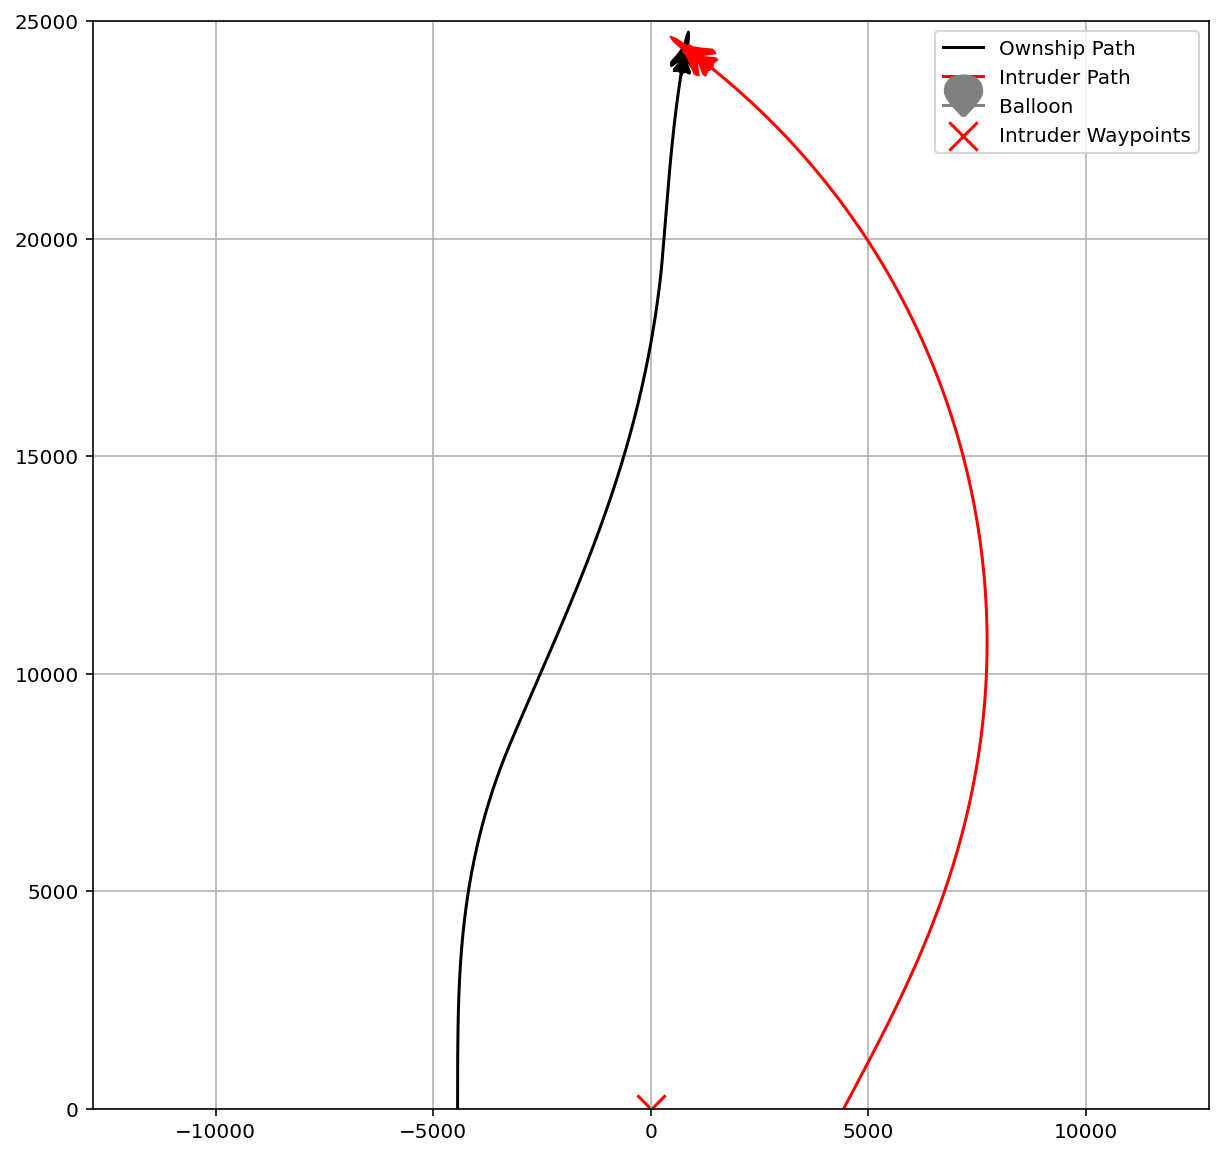

<Figure size 720x720 with 0 Axes>

In [13]:
# run the best example and plot the results (using AcasScenarioViewer)
from csaf_f16.acas import AcasScenarioViewer

x0 = g.optimizer.x_opt
scen = g.scenario_type()
trajs, p = g.run_sim(x0)

viewer = AcasScenarioViewer(trajs, scen)
fig, ax = viewer.summary_plot()
ax.set_xlim(-10000, 10000)
ax.set_ylim(0, 25000)
plt.show()

In [14]:
g.optimizer.x_opt

array([1.50000000e+04, 1.00000000e+03, 8.87880189e+03, 6.62937690e+01,
       4.87926042e-01])

In [1]:
#from IPython.display import HTML
#from matplotlib import animation
#viewer = AcasScenarioViewer(trajs, ar)
#anim = viewer.summary_video(bounds=((-15000, 15000), (-5000, 25000)), msize=0.0005)
# use this to render a video player in the notebooks
#HTML(anim.to_jshtml())
# use this to write it as gif to cwd
#writervideo = animation.FFMpegWriter(fps=30) 
#anim.save(f"{video_title(g.scenario_type())}.gif", writer=writervideo)

In [16]:
import numpy as np
sidxs= np.argsort(g.optimizer.Y.flatten())
Xt, Yt = g.optimizer.X[sidxs[:10]], g.optimizer.Y[sidxs[:10]]

-----
0 [1.50000000e+04 1.00000000e+03 8.87880189e+03 6.62937690e+01
 4.87926042e-01]


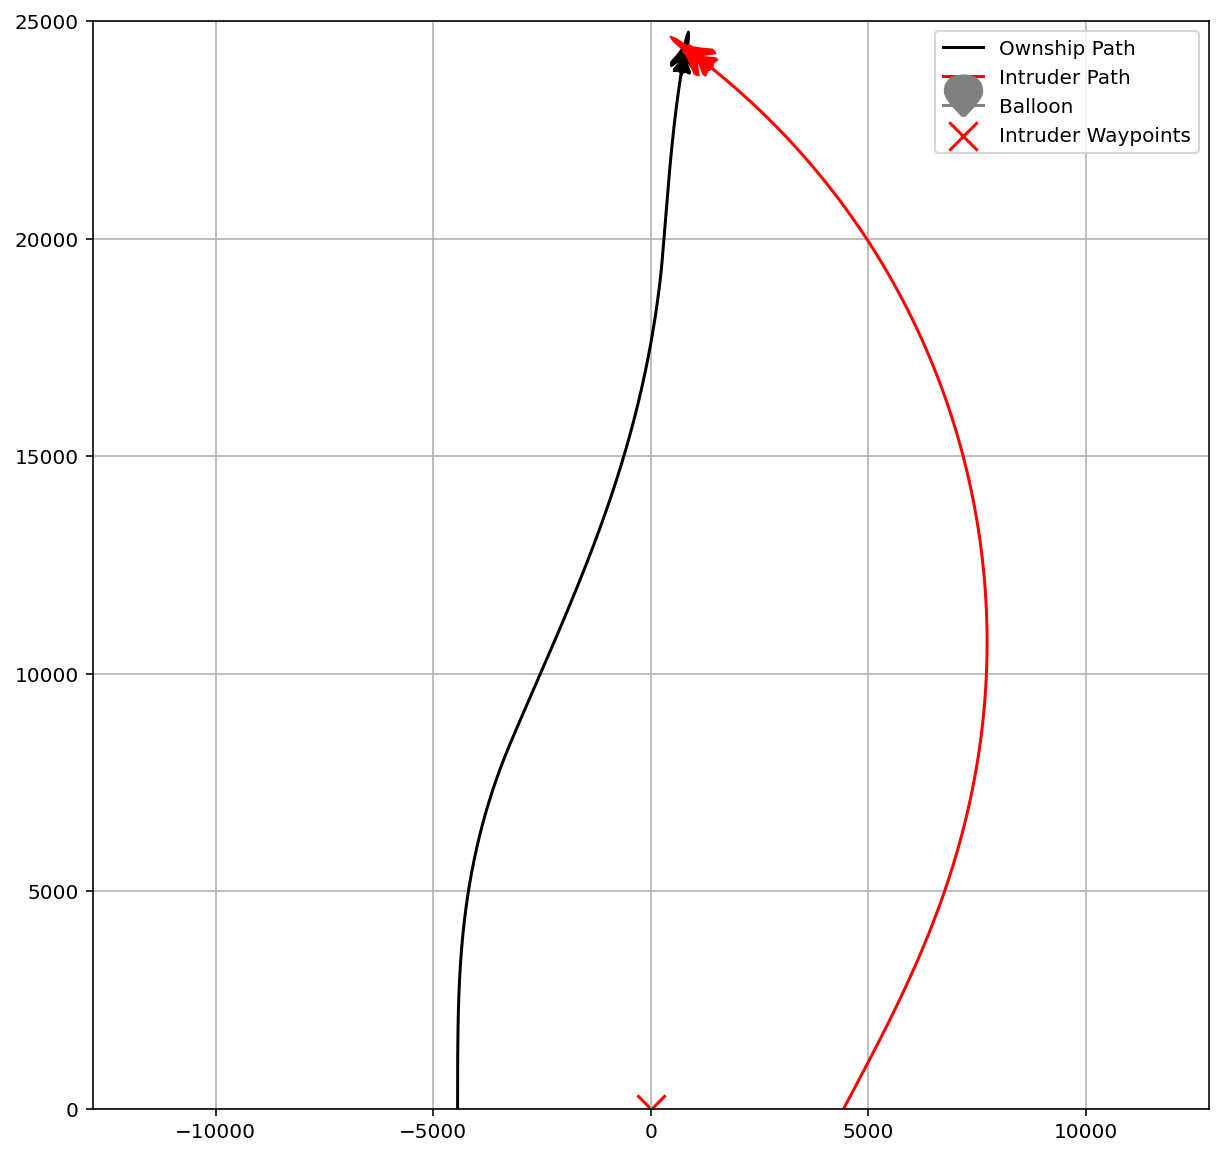

<Figure size 720x720 with 0 Axes>

-----
-----
1 [1.50000000e+04 1.00000000e+03 7.90630663e+03 5.44206783e+01
 4.74603376e-01]


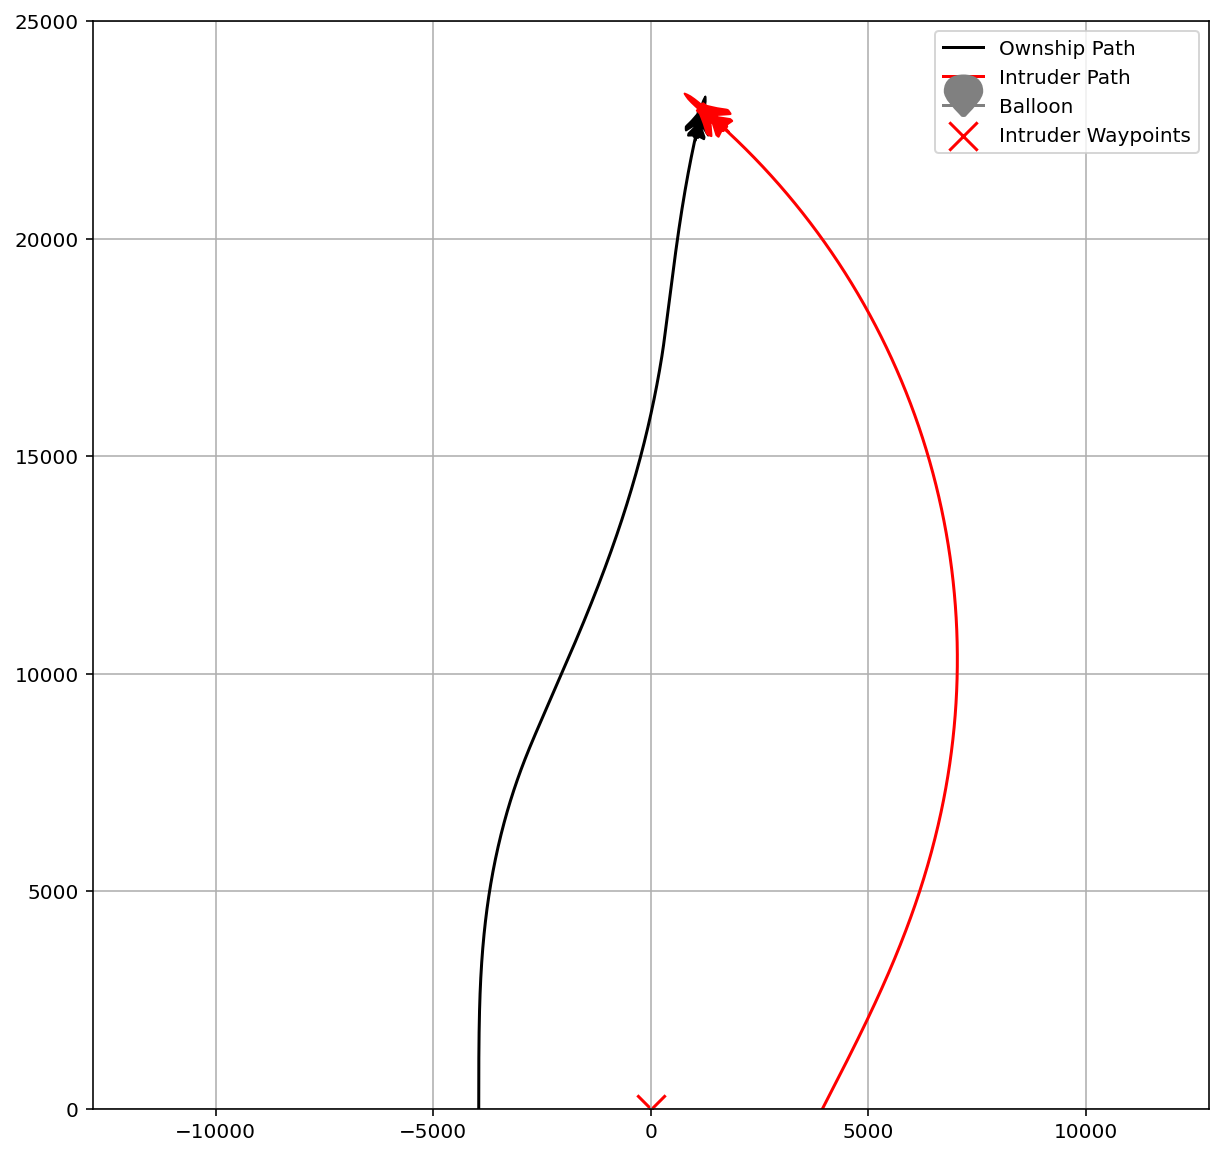

<Figure size 720x720 with 0 Axes>

-----
-----
2 [3.50000000e+04 8.00000000e+02 9.06312984e+03 5.98699353e+01
 6.02394833e-01]


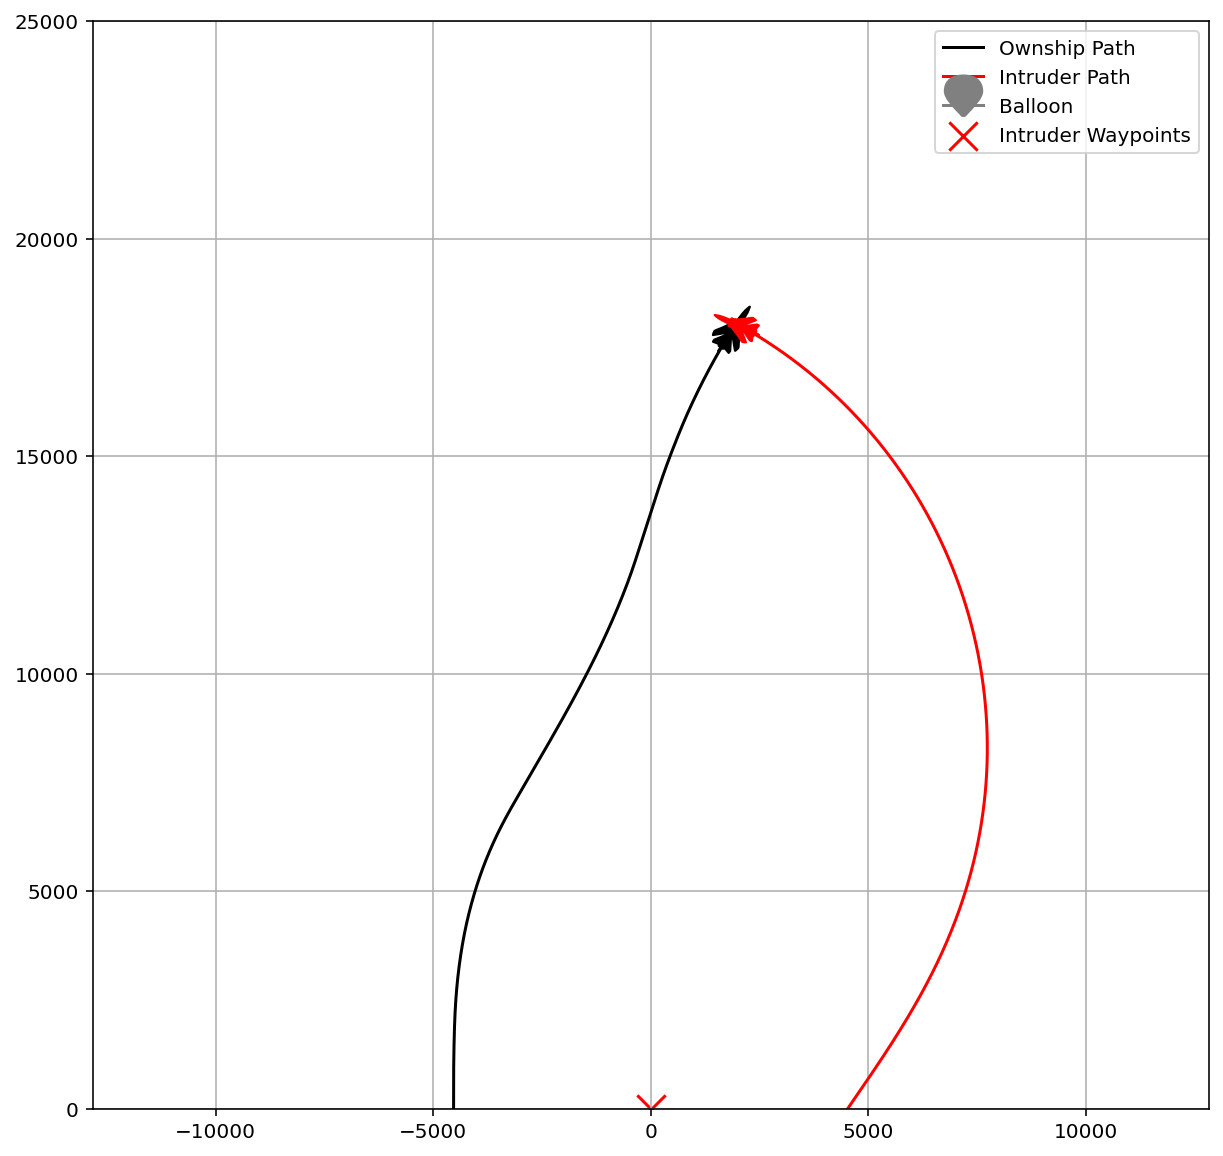

<Figure size 720x720 with 0 Axes>

-----
-----
3 [1.50000000e+04 1.00000000e+03 7.95593674e+03 5.78504439e+01
 4.68904996e-01]


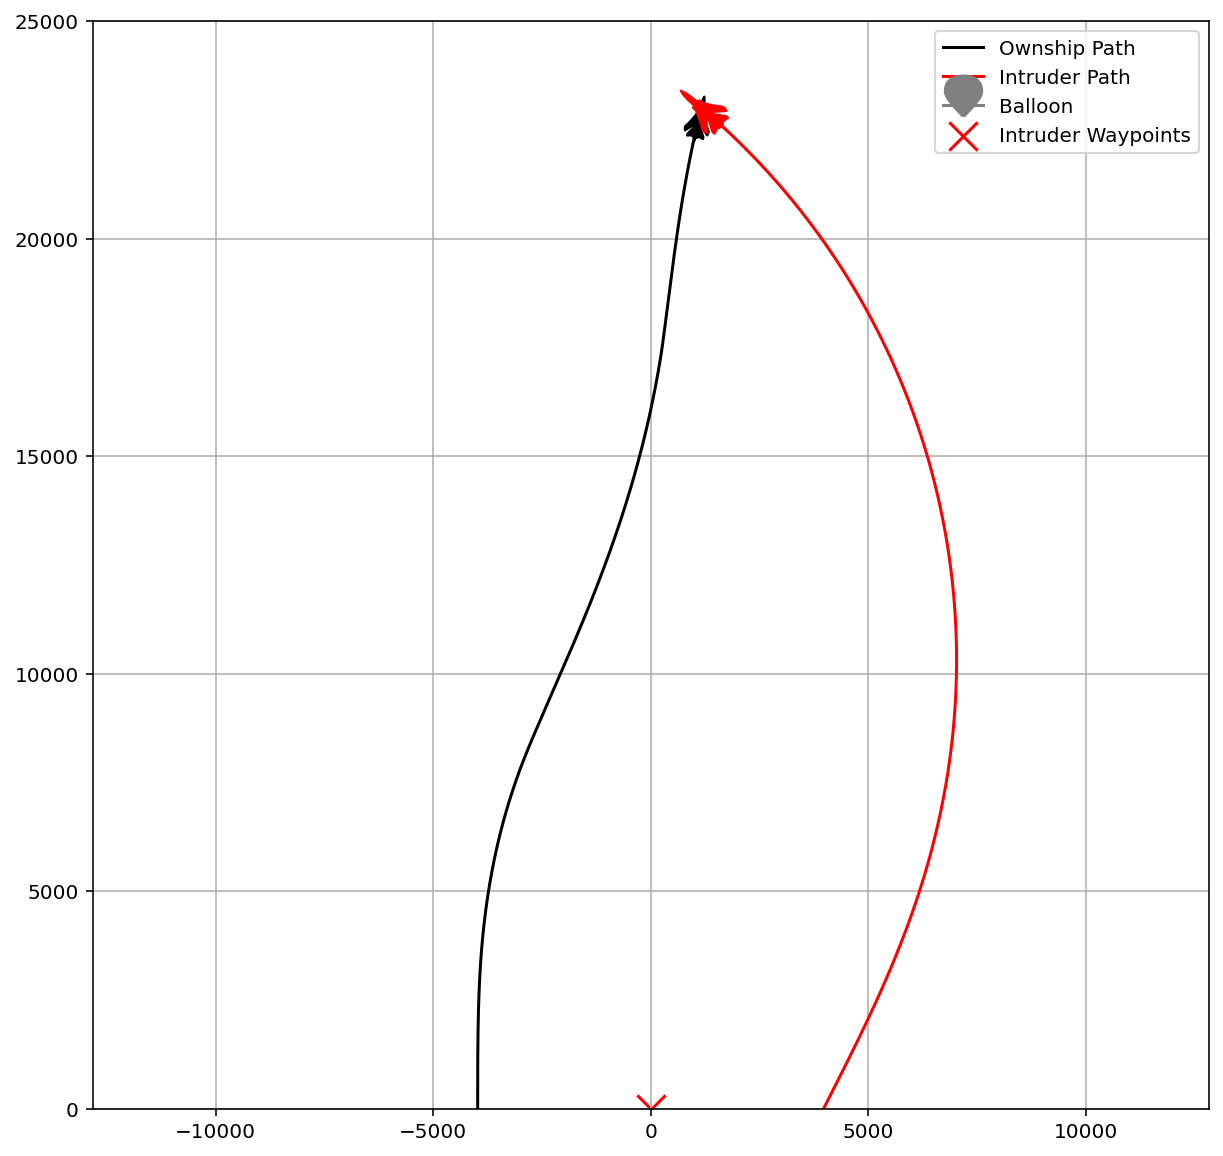

<Figure size 720x720 with 0 Axes>

-----
-----
4 [3.50000000e+04 8.00000000e+02 9.64491109e+03 7.31224729e+01
 5.87894235e-01]


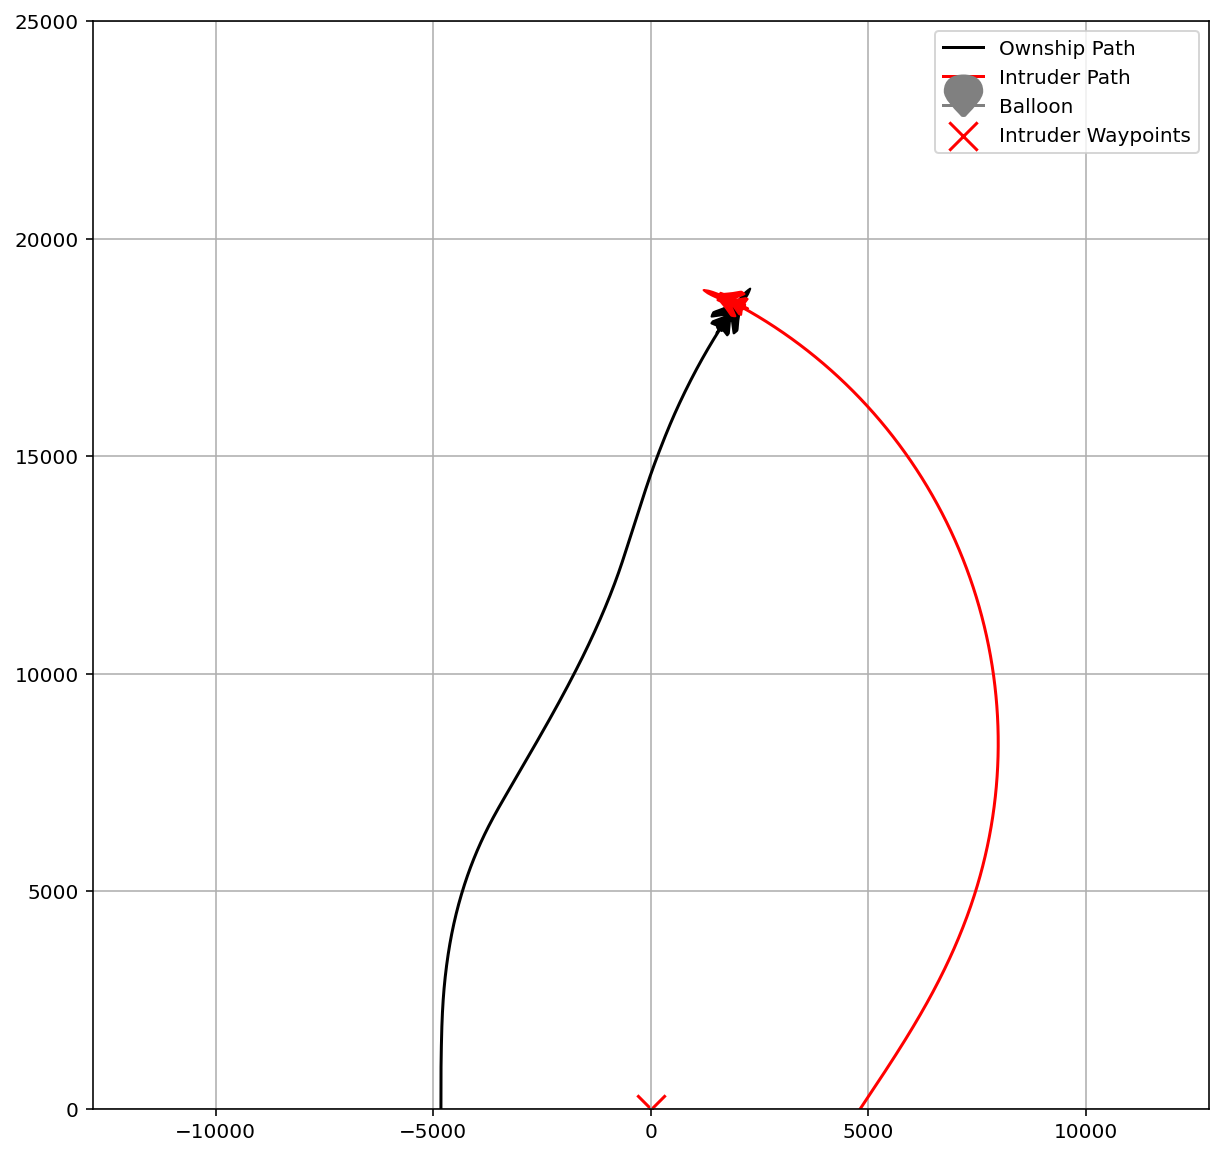

<Figure size 720x720 with 0 Axes>

-----
-----
5 [ 1.50000000e+04  8.00000000e+02 -9.28553379e+03  9.46769728e+01
 -2.92851446e-01]


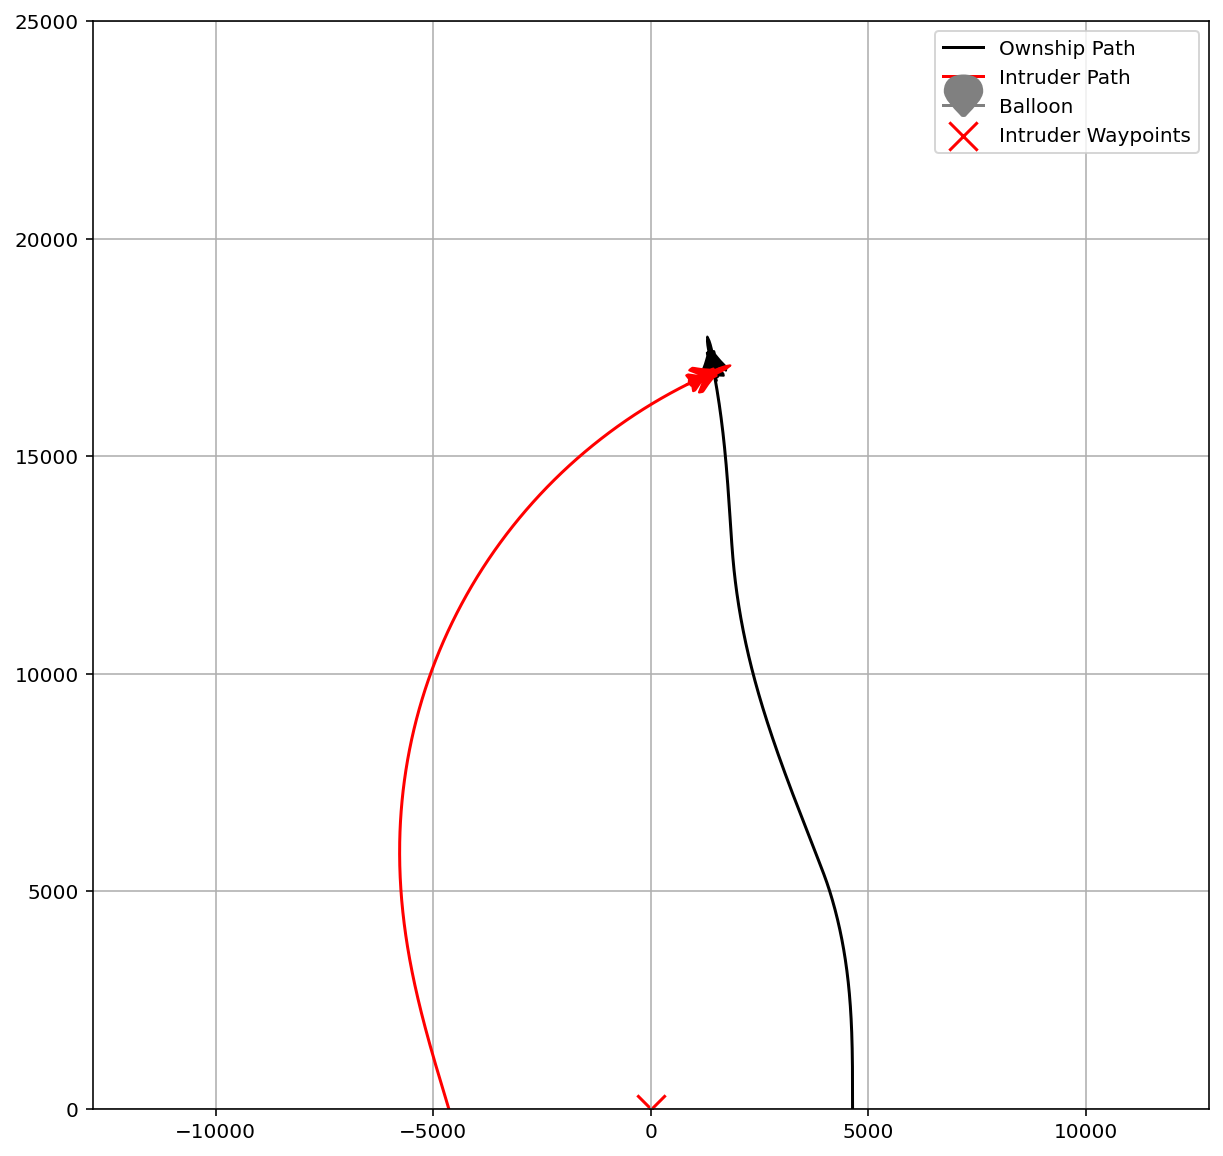

<Figure size 720x720 with 0 Axes>

-----
-----
6 [3.50000000e+04 1.00000000e+03 8.94647395e+03 7.40283895e+01
 4.69660125e-01]


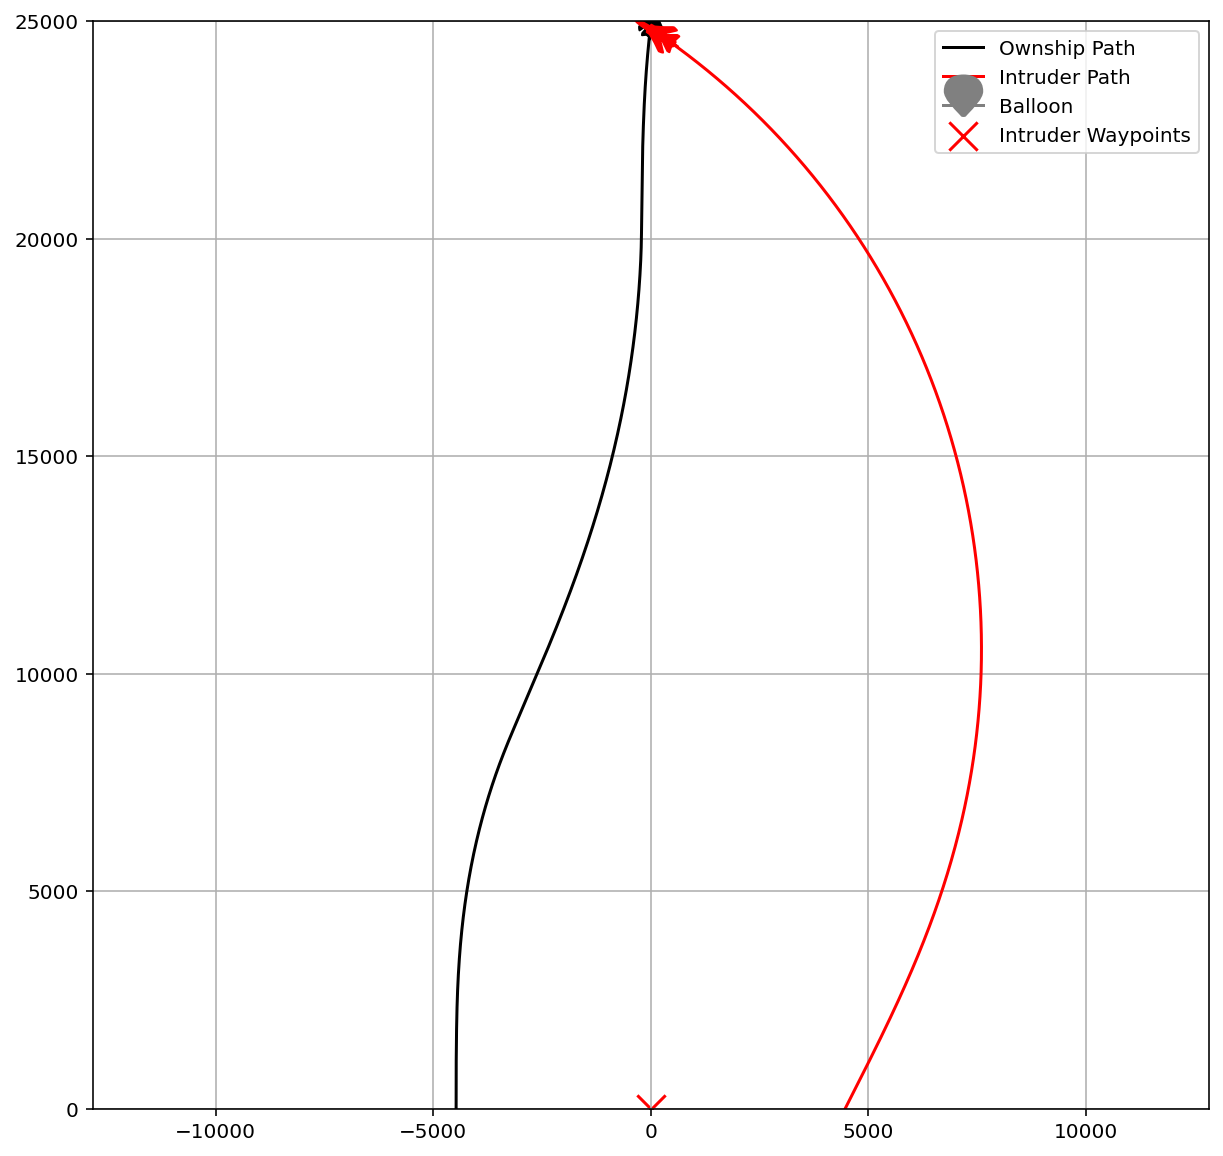

<Figure size 720x720 with 0 Axes>

-----
-----
7 [3.50000000e+04 1.00000000e+03 8.31025003e+03 4.48381733e+01
 4.73270416e-01]


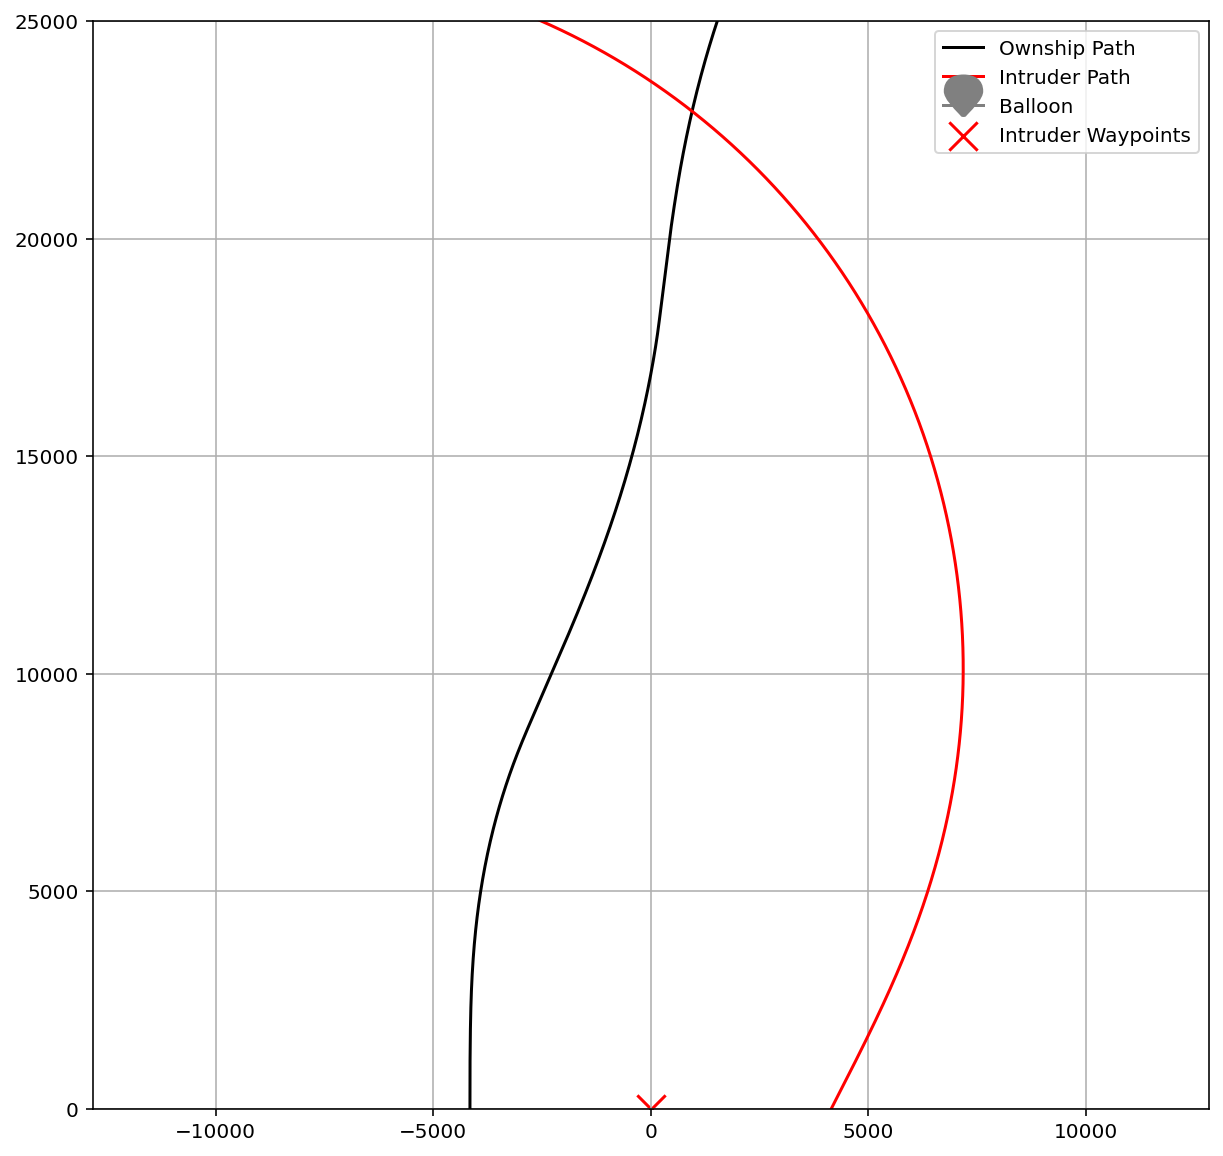

<Figure size 720x720 with 0 Axes>

-----
-----
8 [3.50000000e+04 1.00000000e+03 8.99429518e+03 7.06216299e+01
 4.72500670e-01]


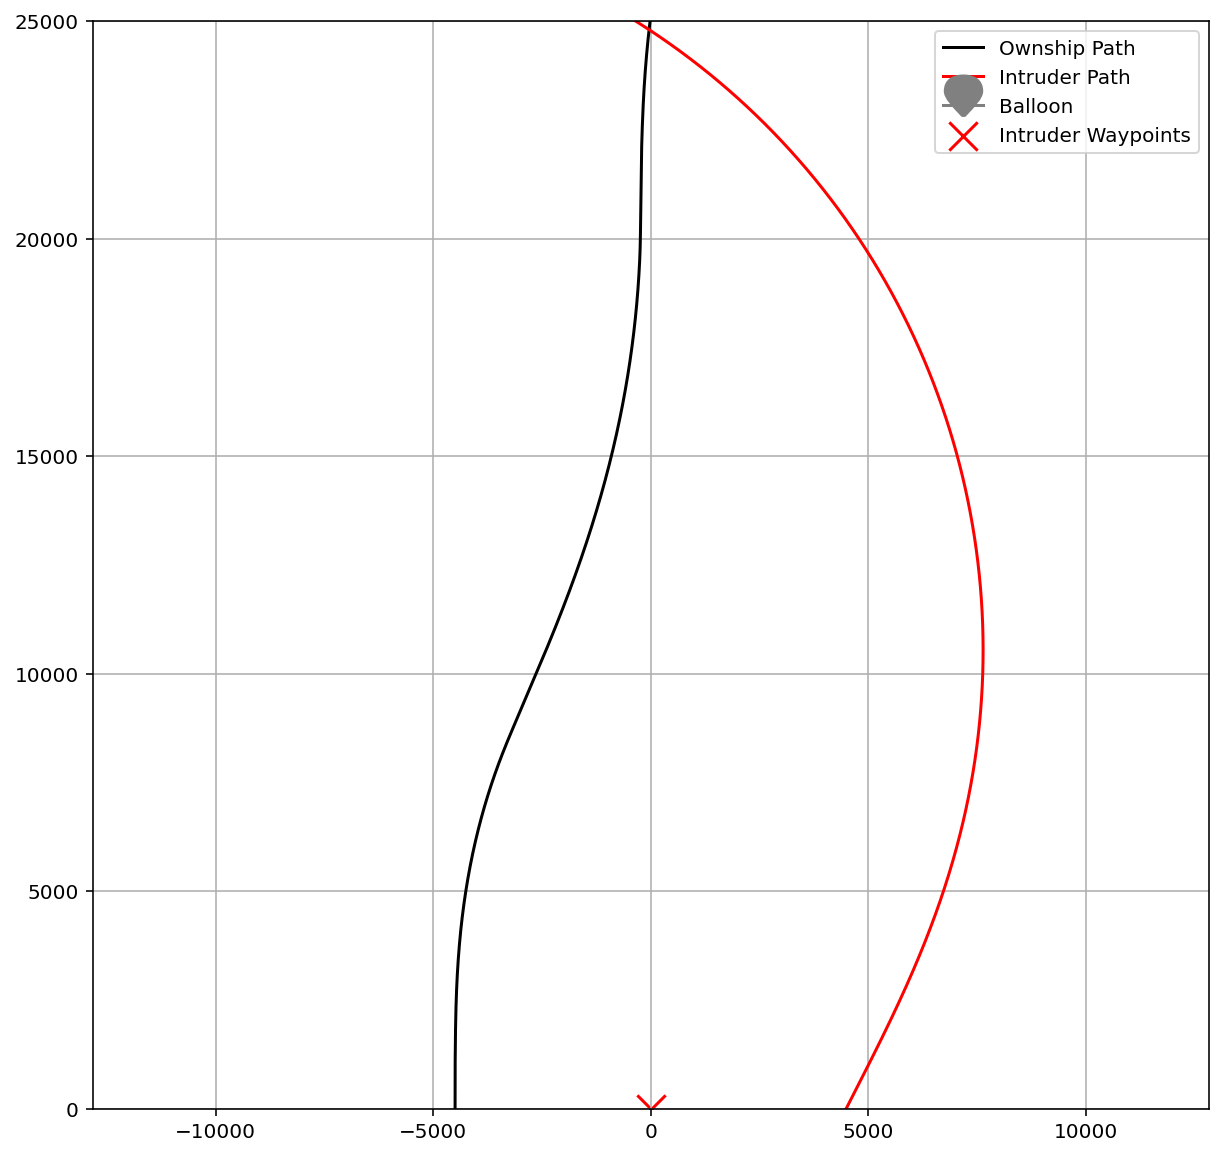

<Figure size 720x720 with 0 Axes>

-----
-----
9 [1.50000000e+04 1.00000000e+03 8.52296636e+03 3.06659275e+01
 4.76747735e-01]


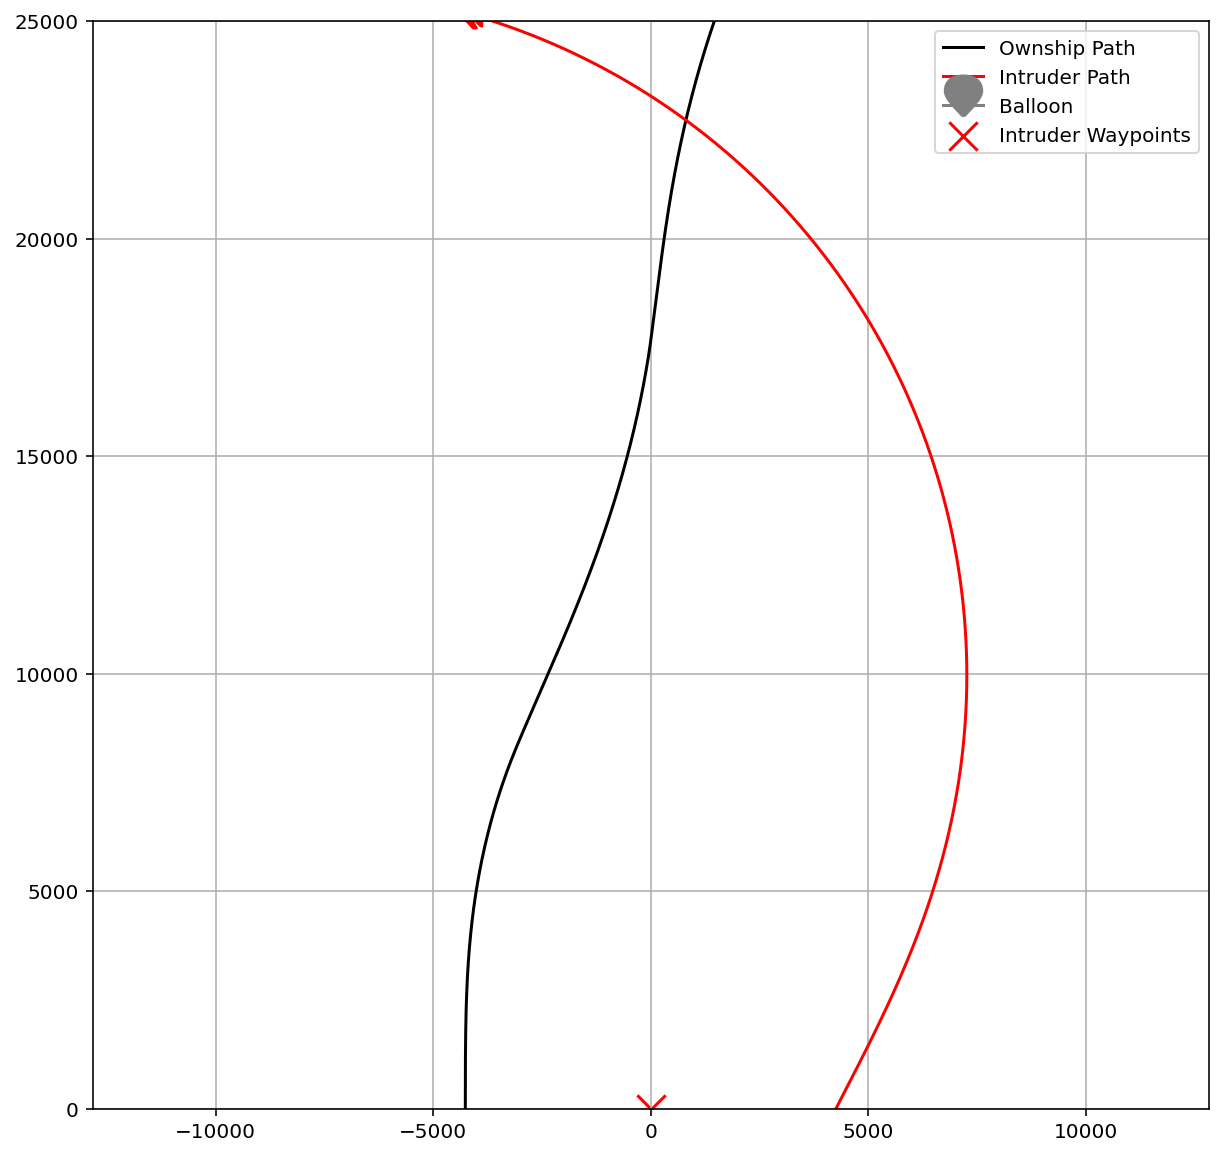

<Figure size 720x720 with 0 Axes>

-----


In [17]:
for idx, xi in enumerate(Xt):
    print("-----")
    print(idx, xi)
    scen = g.scenario_type()
    trajs, p = g.run_sim(xi)

    viewer = AcasScenarioViewer(trajs, scen)
    fig, ax = viewer.summary_plot()
    ax.set_xlim(-10000, 10000)
    ax.set_ylim(0, 25000)
    plt.show()
    print("-----")